# Project Name: Flight Price Prediction


About Project : We have  prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. So we are going to build a machine learning model to predict the price of the flight ticket based on features such as Airline, Date_of_Journey, Dep_Time, Arrival_TimeTotal_Stops etc.

In [230]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [231]:
#Import Dataset
ds= pd.read_excel('Flight_Price_Train.xlsx')
ds.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [232]:
df= pd.DataFrame(data=ds)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [233]:
df.shape

(10683, 11)

In [234]:
df.info

<bound method DataFrame.info of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → 

In [235]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [236]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [237]:
#Checking for Null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Observations: There are Null Values and 1 in eah in column Route and Total Stops, so we can drop these.

In [238]:
df=df.dropna()
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [239]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

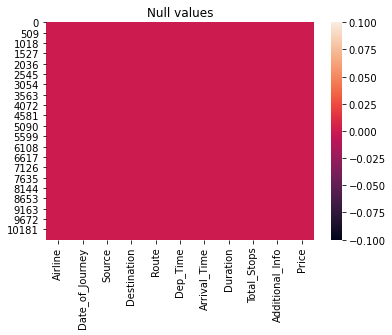

In [240]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observations: Now no null values present in dataset.

# Feature Engineering

In [241]:
#Spliting Date_of_Journey

df[['Journey_Date', 'Journey_Month', 'Journey_Year']]= df.Date_of_Journey.str.split('/', expand=True)
df['Journey_Date']=df['Journey_Date'].astype('int')
df['Journey_Month']=df['Journey_Month'].astype('int')
df['Journey_Year']=df['Journey_Year'].astype('int')

In [242]:
#Spliting of Dep_Time

df[['Dep_HR', 'Dep_Minutes']]= df.Dep_Time.str.split(':', expand= True)
df['Dep_HR']=df['Dep_HR'].astype('int')
df['Dep_Minutes']=df['Dep_Minutes'].astype('int')

In [243]:
df['Arrival_Time'].unique

<bound method Series.unique of 0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object>

In [244]:
#Spliting of Arrival_Time

df['Arrival_Time']= df.Arrival_Time.str.split(' ', expand= True)
df[['Arrival_HR', 'Arrival_Minutes']]= df.Arrival_Time.str.split(':', expand= True)
df['Arrival_HR']=df['Arrival_HR'].astype('int')
df['Arrival_Minutes']=df['Arrival_Minutes'].astype('int')

In [245]:
#Droping the Date_of_Journey, Dep_Time, Arrival_Time

df.drop(["Date_of_Journey", "Dep_Time", "Arrival_Time"], axis = 1, inplace = True)

In [246]:
# Getting total minutes from Duration

df['Duration'] = (pd.to_timedelta(df['Duration']).dt.seconds // 60).astype(str)
df['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: object

In [247]:
df['Duration']=df['Duration'].astype('int')

In [248]:
df['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int32

In [249]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [250]:
df['Total_Stops'].replace({'non-stop':0, '2 stops':2, '1 stop': 1,  '3 stops': 3, '4 stops': 4}, inplace= True)
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [251]:
df['Journey_Year'].value_counts()

2019    10682
Name: Journey_Year, dtype: int64

In [252]:
# Route and Total_Stops are related to each other

df.drop(["Route", 'Journey_Year'], axis = 1, inplace = True)

In [253]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_HR,Dep_Minutes,Arrival_HR,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,16,50,21,35


# EDA

In [254]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

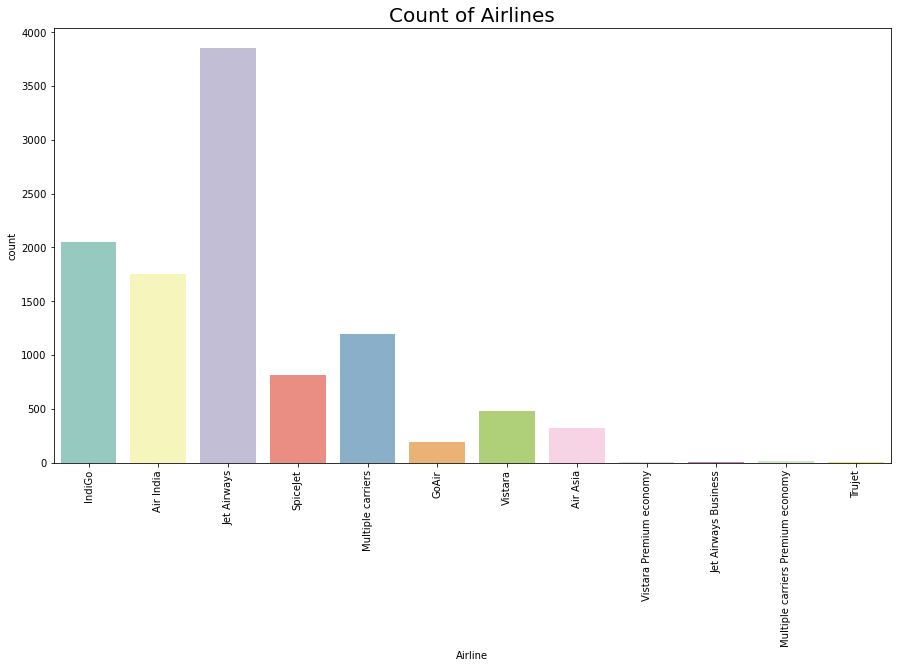

In [255]:
plt.figure(figsize=(15,8))
sns.countplot(df['Airline'], palette='Set3')
plt.title('Count of Airlines', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: There are most of Jet-Airways having almost 3800 counts.

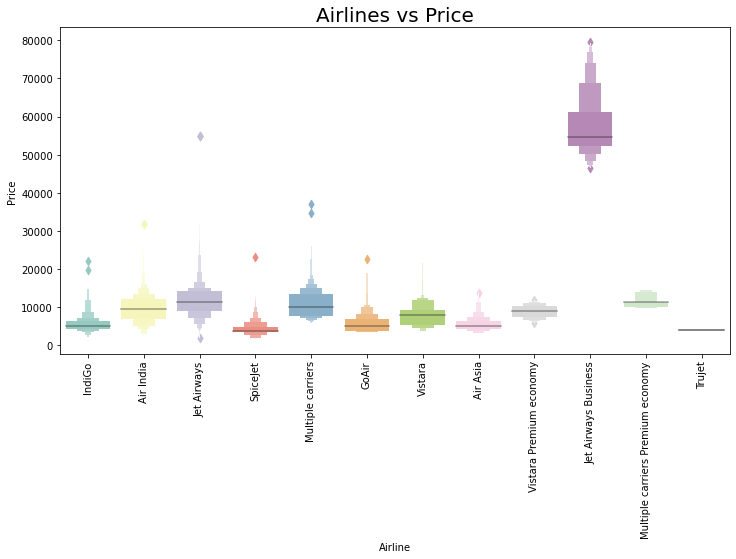

In [256]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Airline'], df['Price'], palette='Set3')
plt.title('Airlines vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: We can see that for Jet Airways Business having maximum price rate which is distributed from  min. 50000 to 80000, where as spice Jet having less than all minimum price rate which is distributed from  min. 2500 to 10000. 

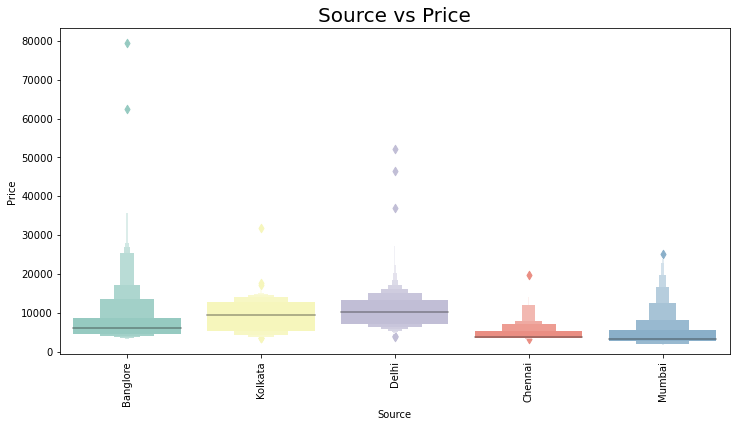

In [257]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Source'], df['Price'], palette='Set3')
plt.title('Source vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: Flight which are started from Lokata and Delhi has more price disctributed in 5000 to 15000.

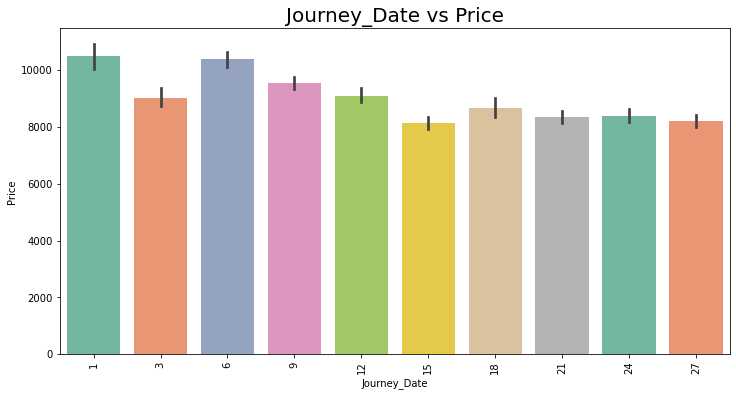

In [258]:
plt.figure(figsize=(12,6))
sns.barplot(df['Journey_Date'], df['Price'], palette='Set2')
plt.title('Journey_Date vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: For month starting i.e. on date 1, there is maximum price value.

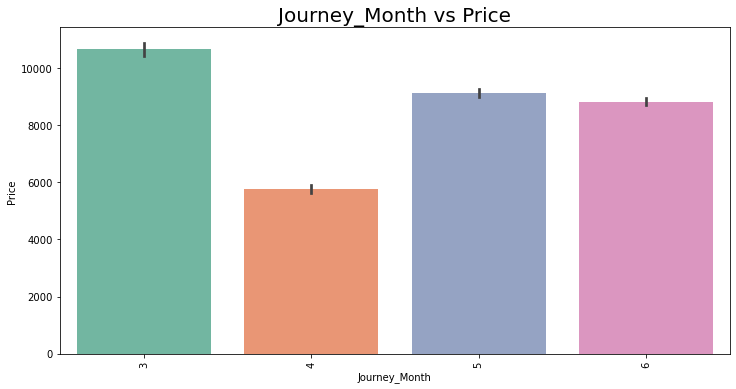

In [259]:
plt.figure(figsize=(12,6))
sns.barplot(df['Journey_Month'], df['Price'], palette='Set2')
plt.title('Journey_Month vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: Thre is maximum flight price in 3rd i.t. in March month.

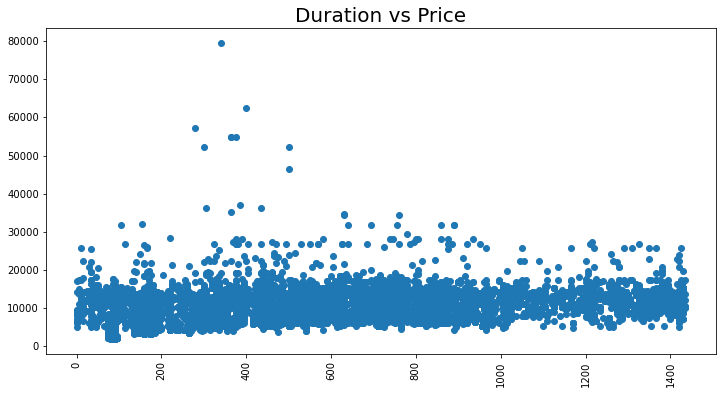

In [260]:
plt.figure(figsize=(12,6))
plt.scatter(df['Duration'], df['Price'])
plt.title('Duration vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: Almost for all duration flight price is distributed in between 5000 to 20000.

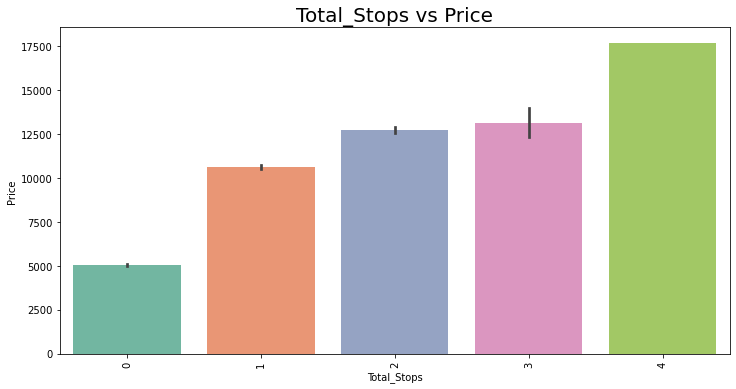

In [261]:
plt.figure(figsize=(12,6))
sns.barplot(df['Total_Stops'], df['Price'], palette='Set2')
plt.title('Total_Stops vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: As number of total_stops increases, price of flight also increases.

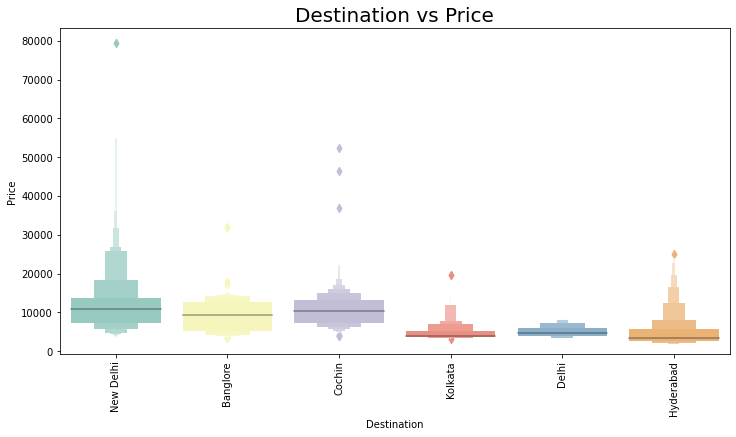

In [262]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Destination'], df['Price'], palette='Set3')
plt.title('Destination vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: Flights those are going to New Delhi are having more price distribution.

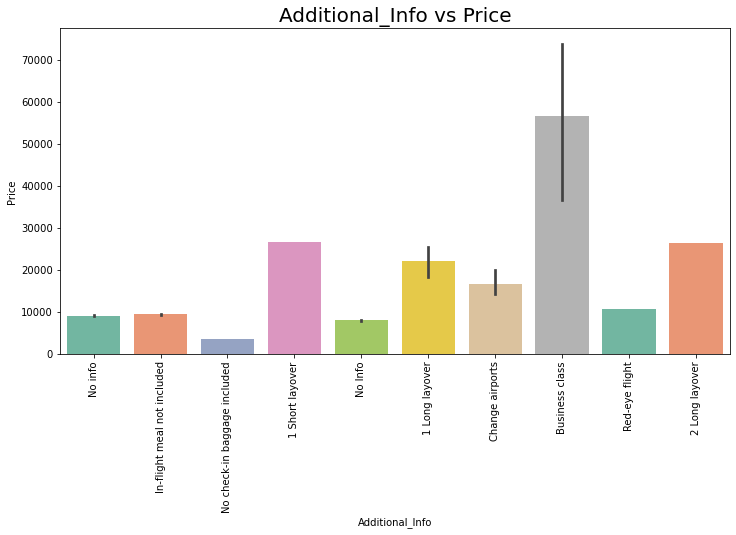

In [263]:
plt.figure(figsize=(12,6))
sns.barplot(df['Additional_Info'], df['Price'], palette='Set2')
plt.title('Additional_Info vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: For Business class there is higher price.

In [264]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [265]:
# Additional_Info contains almost 80% no_info
df.drop('Additional_Info', axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Dep_HR,Dep_Minutes,Arrival_HR,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,16,50,21,35


In [266]:
df.dtypes

Airline            object
Source             object
Destination        object
Duration            int32
Total_Stops         int64
Price               int64
Journey_Date        int32
Journey_Month       int32
Dep_HR              int32
Dep_Minutes         int32
Arrival_HR          int32
Arrival_Minutes     int32
dtype: object

In [267]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
df.head()   

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Dep_HR,Dep_Minutes,Arrival_HR,Arrival_Minutes
0,3,0,5,170,0,3897,24,3,22,20,1,10
1,1,3,0,445,2,7662,1,5,5,50,13,15
2,4,2,1,1140,2,13882,9,6,9,25,4,25
3,3,3,0,325,1,6218,12,5,18,5,23,30
4,3,0,5,285,1,13302,1,3,16,50,21,35


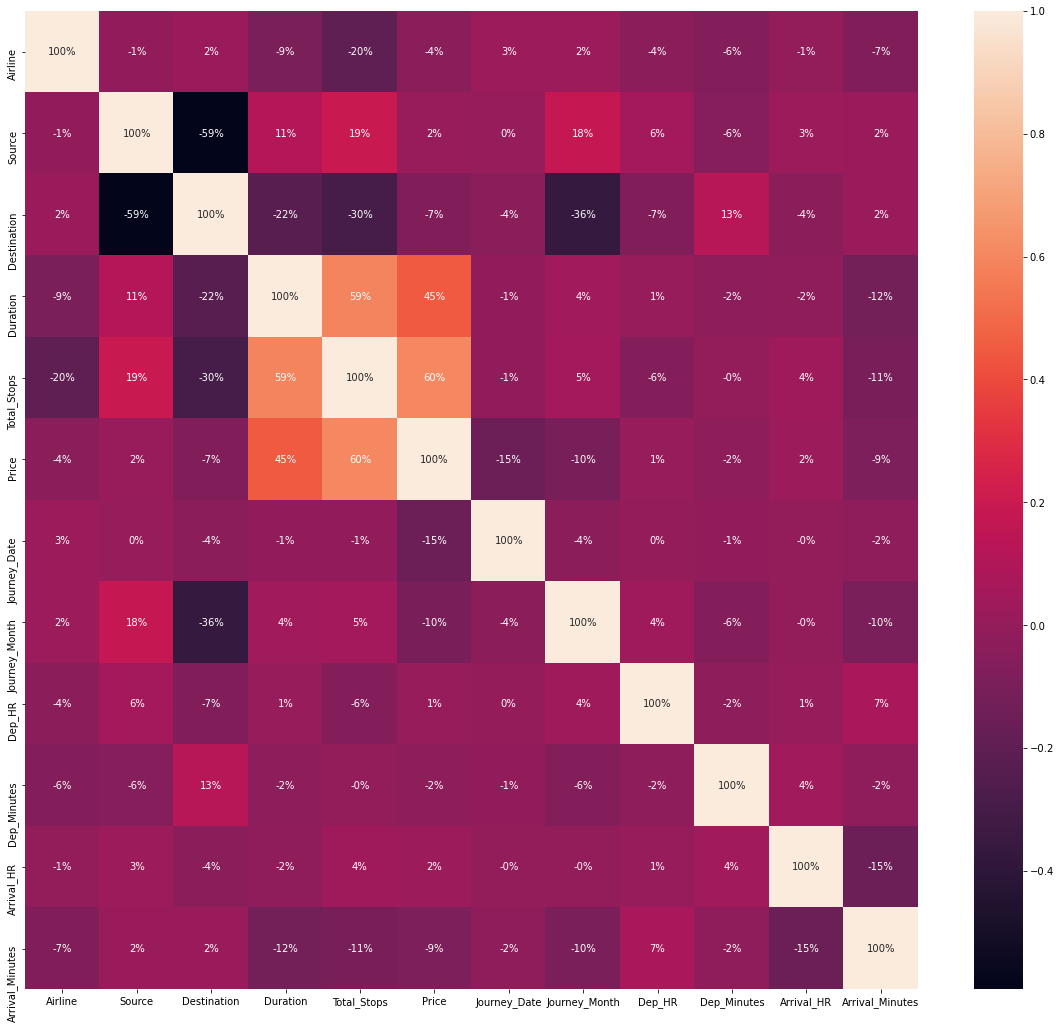

In [268]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot= True, fmt= '.0%')

Observations: Flight price is highly correlated with total stops and Duration of flight.

Airline                AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Source              AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Destination         AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Duration            AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
Total_Stops         AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
Price               AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
Journey_Date        AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
Journey_Month       AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
Dep_HR                AxesSubplot(0.125,0.518913;0.0824468x0.16413)
Dep_Minutes        AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
Arrival_HR         AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
Arrival_Minutes    AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
dtype: object

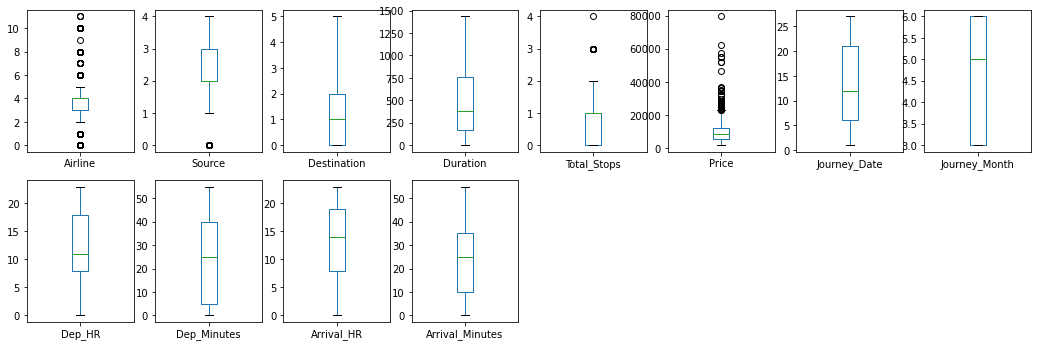

In [269]:
#Checking for the Outliers

df.plot(kind= 'box', subplots= True, layout= (4,8), figsize=(18,12))

Observations: There are maximum outliers are present in Price. That one we need to remove.

In [270]:
#Removing the Outliers

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
df_new= df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Dep_HR,Dep_Minutes,Arrival_HR,Arrival_Minutes
0,3,0,5,170,0,3897,24,3,22,20,1,10
1,1,3,0,445,2,7662,1,5,5,50,13,15
2,4,2,1,1140,2,13882,9,6,9,25,4,25
3,3,3,0,325,1,6218,12,5,18,5,23,30
4,3,0,5,285,1,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,4107,9,4,19,55,22,25
10679,1,3,0,155,0,4145,27,4,20,45,23,20
10680,4,0,2,180,0,7229,27,4,8,20,11,20
10681,10,0,5,160,0,12648,1,3,11,30,14,10


In [271]:
df_new.shape

(10540, 12)

In [272]:
df.shape

(10682, 12)

Observations: We can observe that there are almost 142 rows removed due to outliers.

In [273]:
#Splitting DATA

df= df_new
x= df.drop('Price', axis=1)
y= df[['Price']]
print(x.shape)
print(y.shape)

(10540, 11)
(10540, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002154C3C0A90>,
      dtype=object)

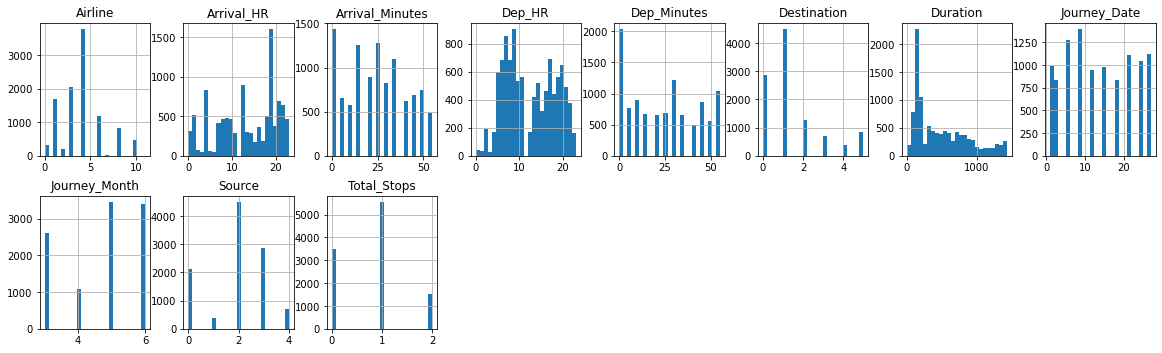

In [274]:
x.hist(figsize=(20,12), layout= (4,8), grid= True, bins=25)

Observations: We can see that duration, Dep_Hr are some what left skewed.

In [275]:
x.skew()

Airline            0.732055
Source            -0.437082
Destination        1.266180
Duration           0.839532
Total_Stops        0.227136
Journey_Date       0.109268
Journey_Month     -0.408944
Dep_HR             0.107749
Dep_Minutes        0.173743
Arrival_HR        -0.369568
Arrival_Minutes    0.108037
dtype: float64

In [276]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
for i in x.columns:
    if x[i].skew()>0.5:
        x[i] = np.log(1+df[i])
x.skew()

Airline           -0.686154
Source            -0.437082
Destination        0.283525
Duration          -0.816062
Total_Stops        0.227136
Journey_Date       0.109268
Journey_Month     -0.408944
Dep_HR             0.107749
Dep_Minutes        0.173743
Arrival_HR        -0.369568
Arrival_Minutes    0.108037
dtype: float64

In [277]:
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_Date,Journey_Month,Dep_HR,Dep_Minutes,Arrival_HR,Arrival_Minutes
0,1.386294,0,1.791759,5.141664,0,24,3,22,20,1,10
1,0.693147,3,0.000000,6.100319,2,1,5,5,50,13,15
2,1.609438,2,0.693147,7.039660,2,9,6,9,25,4,25
3,1.386294,3,0.000000,5.786897,1,12,5,18,5,23,30
4,1.386294,0,1.791759,5.655992,1,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,0.000000,3,0.000000,5.017280,0,9,4,19,55,22,25
10679,0.693147,3,0.000000,5.049856,0,27,4,20,45,23,20
10680,1.609438,0,1.098612,5.198497,0,27,4,8,20,11,20
10681,2.397895,0,1.791759,5.081404,0,1,3,11,30,14,10


In [278]:
y

,Price
0,3897
1,7662
2,13882
3,6218
4,13302
...,...
10678,4107
10679,4145
10680,7229
10681,12648


In [279]:
#Standardization of Data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaledX= scaler.fit_transform(x)
new_x= pd.DataFrame(data=scaledX, columns= x.columns)
x=new_x
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_Date,Journey_Month,Dep_HR,Dep_Minutes,Arrival_HR,Arrival_Minutes
0,-0.177459,-1.677843,1.927973,-0.747662,-1.226383,1.230057,-1.489813,1.651779,-0.230990,-1.801265,-0.889224
1,-1.488178,0.884628,-1.297991,0.281854,1.795846,-1.493392,0.237934,-1.306902,1.370571,-0.050591,-0.586927
2,0.244498,0.030471,-0.050018,1.290629,1.795846,-0.546105,1.101807,-0.610742,0.035936,-1.363596,0.017667
3,-0.177459,0.884628,-1.297991,-0.054734,0.284732,-0.190873,0.237934,0.955619,-1.031771,1.408304,0.319965
4,-0.177459,-1.677843,1.927973,-0.195316,0.284732,-1.493392,-1.489813,0.607539,1.370571,1.116525,0.622262
...,...,...,...,...,...,...,...,...,...,...,...
10535,-2.798896,0.884628,-1.297991,-0.881240,-1.226383,-0.546105,-0.625939,1.129659,1.637497,1.262415,0.017667
10536,-1.488178,0.884628,-1.297991,-0.846256,-1.226383,1.585290,-0.625939,1.303699,1.103644,1.408304,-0.284630
10537,0.244498,-1.677843,0.680000,-0.686628,-1.226383,1.585290,-0.625939,-0.784782,-0.230990,-0.342370,-0.284630
10538,1.735445,-1.677843,1.927973,-0.812375,-1.226383,-1.493392,-1.489813,-0.262662,0.302863,0.095299,-0.889224


In [280]:
#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [281]:
#Finding Best Random State
maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=i)
    lm= LinearRegression()
    lm.fit(x_train, y_train)
    pred_lm= lm.predict(x_test)
    acc= r2_score(y_test, pred_lm)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.5545775469182124
90


In [282]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=90)

In [283]:
lm= LinearRegression()
ls= Lasso()
rd= Ridge()
enr= ElasticNet()
svr= SVR()
dtc= DecisionTreeRegressor()
knn= KNeighborsRegressor()
adr= AdaBoostRegressor()
rfr= RandomForestRegressor()
gbr= GradientBoostingRegressor()

models= [lm,ls,rd,enr,svr,dtc,knn,adr,rfr,gbr]

for m in models:
    print(m, '- R2_Score')
    m.fit(x_train, y_train)
    pred= m.predict(x_test)
    print(r2_score(y_test, pred))
    print()

LinearRegression() - R2_Score
0.5545775469182124

Lasso() - R2_Score
0.5545477685530912

Ridge() - R2_Score
0.554571514545668

ElasticNet() - R2_Score
0.4889392979373921

SVR() - R2_Score
0.052350507034015004

DecisionTreeRegressor() - R2_Score
0.7297712627005479

KNeighborsRegressor() - R2_Score
0.7672054213537087

AdaBoostRegressor() - R2_Score
0.6107331200113276

RandomForestRegressor() - R2_Score
0.823945210118798

GradientBoostingRegressor() - R2_Score
0.7869649801870712



In [284]:
#Cross Validation
from sklearn.model_selection import cross_val_score

for m in models:
    scr_lm= cross_val_score(m, x,y, cv=5)
    print('CV score of ',m,  scr_lm.mean())

CV score of  LinearRegression() 0.5130827040796491
CV score of  Lasso() 0.5130827808204537
CV score of  Ridge() 0.513083001021692
CV score of  ElasticNet() 0.46391891900143784
CV score of  SVR() 0.055820129779858355
CV score of  DecisionTreeRegressor() 0.7097651850276925
CV score of  KNeighborsRegressor() 0.752136918016439
CV score of  AdaBoostRegressor() 0.5914380371714868
CV score of  RandomForestRegressor() 0.8127730429793687
CV score of  GradientBoostingRegressor() 0.777906166543004


Observations: From above we can observe that for RandomForestRegressor model there is less difference in r2_score and cross validation r2_score so we will select RandomForestRegressor model for final predictions.

In [285]:
#Hyperparameter Tuning for Best selected model  RandomForestRegressor

from sklearn.model_selection import GridSearchCV

parameters= {'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4,],
    'min_samples_split': [10, 12],
    'n_estimators': [100, 500]}

GSV= GridSearchCV(rfr, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

In [286]:
GSV_predict= GSV.best_estimator_.predict(x_test)
print(r2_score(y_test, GSV_predict))
print('Mean absolute error:',mean_absolute_error(y_test, GSV_predict))
print('Mean squared error: ', mean_squared_error(y_test, GSV_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, GSV_predict)))

0.8359614479333413
Mean absolute error: 1184.3806918213795
Mean squared error:  2776348.411975045
Root mean squared error:  1666.2378017483115


In [287]:
#Saving the Model
import joblib

joblib.dump(GSV.best_estimator_, 'Flight_Price_Prediction_best_rfr_model.obj')

['Flight_Price_Prediction_best_rfr_model.obj']

# Working on TEST data

In [288]:
#Import Dataset
ds= pd.read_excel('Flight_Price_Test.xlsx')
ds.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [289]:
df= pd.DataFrame(data=ds)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [290]:
df.shape

(2671, 10)

In [291]:
df.info

<bound method DataFrame.info of                 Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20     

In [292]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [293]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [294]:
#Checking for Null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

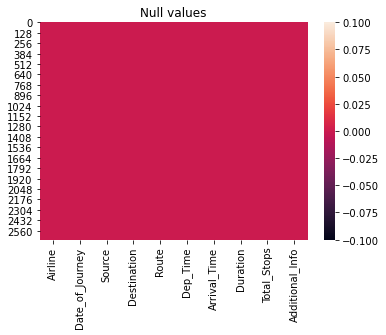

In [295]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observations: No null values are present in dataset.

# Feature Engineering 

In [296]:
#Spliting Date_of_Journey

df[['Journey_Date', 'Journey_Month', 'Journey_Year']]= df.Date_of_Journey.str.split('/', expand=True)
df['Journey_Date']=df['Journey_Date'].astype('int')
df['Journey_Month']=df['Journey_Month'].astype('int')
df['Journey_Year']=df['Journey_Year'].astype('int')

In [297]:
#Spliting of Dep_Time

df[['Dep_HR', 'Dep_Minutes']]= df.Dep_Time.str.split(':', expand= True)
df['Dep_HR']=df['Dep_HR'].astype('int')
df['Dep_Minutes']=df['Dep_Minutes'].astype('int')

In [298]:
#Spliting of Arrival_Time

df['Arrival_Time']= df.Arrival_Time.str.split(' ', expand= True)
df[['Arrival_HR', 'Arrival_Minutes']]= df.Arrival_Time.str.split(':', expand= True)
df['Arrival_HR']=df['Arrival_HR'].astype('int')
df['Arrival_Minutes']=df['Arrival_Minutes'].astype('int')

In [299]:
#Droping the Date_of_Journey, Dep_Time, Arrival_Time

df.drop(["Date_of_Journey", "Dep_Time", "Arrival_Time"], axis = 1, inplace = True)

In [300]:
# Getting total minutes from Duration

df['Duration'] = (pd.to_timedelta(df['Duration']).dt.seconds // 60).astype(str)
df['Duration']

0        655
1        240
2       1425
3        780
4        170
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Duration, Length: 2671, dtype: object

In [301]:
df['Duration']=df['Duration'].astype('int')

In [302]:
df['Duration']

0        655
1        240
2       1425
3        780
4        170
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Duration, Length: 2671, dtype: int32

In [303]:
df['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [304]:
df['Total_Stops'].replace({'non-stop':0, '2 stops':2, '1 stop': 1,  '3 stops': 3, '4 stops': 4}, inplace= True)
df['Total_Stops'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [305]:
df['Journey_Year'].value_counts()

2019    2671
Name: Journey_Year, dtype: int64

In [306]:
# Route and Total_Stops are related to each other

df.drop(["Route", 'Journey_Year'], axis = 1, inplace = True)

In [307]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_Date,Journey_Month,Dep_HR,Dep_Minutes,Arrival_HR,Arrival_Minutes
0,Jet Airways,Delhi,Cochin,655,1,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,240,1,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1425,1,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,780,1,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,170,0,No info,24,6,23,55,2,45


# EDA

In [308]:
df['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

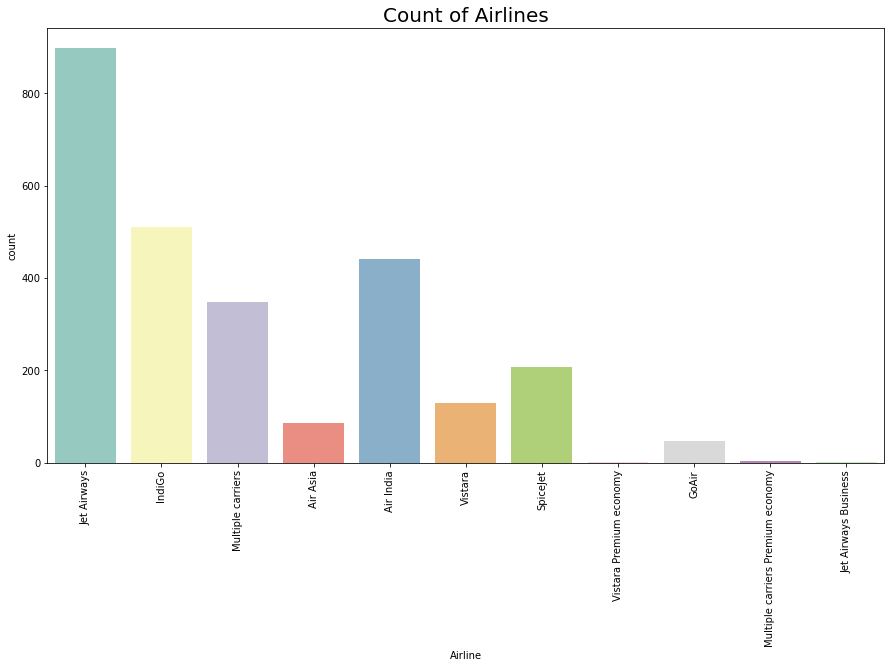

In [309]:
plt.figure(figsize=(15,8))
sns.countplot(df['Airline'], palette='Set3')
plt.title('Count of Airlines', size=20)
plt.xticks(rotation=90)
plt.show()

Observations: There are most of Jet-Airways having almost 900 counts.

In [310]:
df['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [311]:
# Additional_Info contains almost 90% no_info
df.drop('Additional_Info', axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_Date,Journey_Month,Dep_HR,Dep_Minutes,Arrival_HR,Arrival_Minutes
0,Jet Airways,Delhi,Cochin,655,1,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,240,1,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1425,1,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,780,1,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,170,0,24,6,23,55,2,45


In [312]:
df.dtypes

Airline            object
Source             object
Destination        object
Duration            int32
Total_Stops         int64
Journey_Date        int32
Journey_Month       int32
Dep_HR              int32
Dep_Minutes         int32
Arrival_HR          int32
Arrival_Minutes     int32
dtype: object

In [313]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
df.head()   

,Airline,Source,Destination,Duration,Total_Stops,Journey_Date,Journey_Month,Dep_HR,Dep_Minutes,Arrival_HR,Arrival_Minutes
0,4,2,1,655,1,6,6,17,30,4,25
1,3,3,0,240,1,12,5,6,20,10,20
2,4,2,1,1425,1,21,5,19,15,19,0
3,6,2,1,780,1,21,5,8,0,21,0
4,0,0,2,170,0,24,6,23,55,2,45


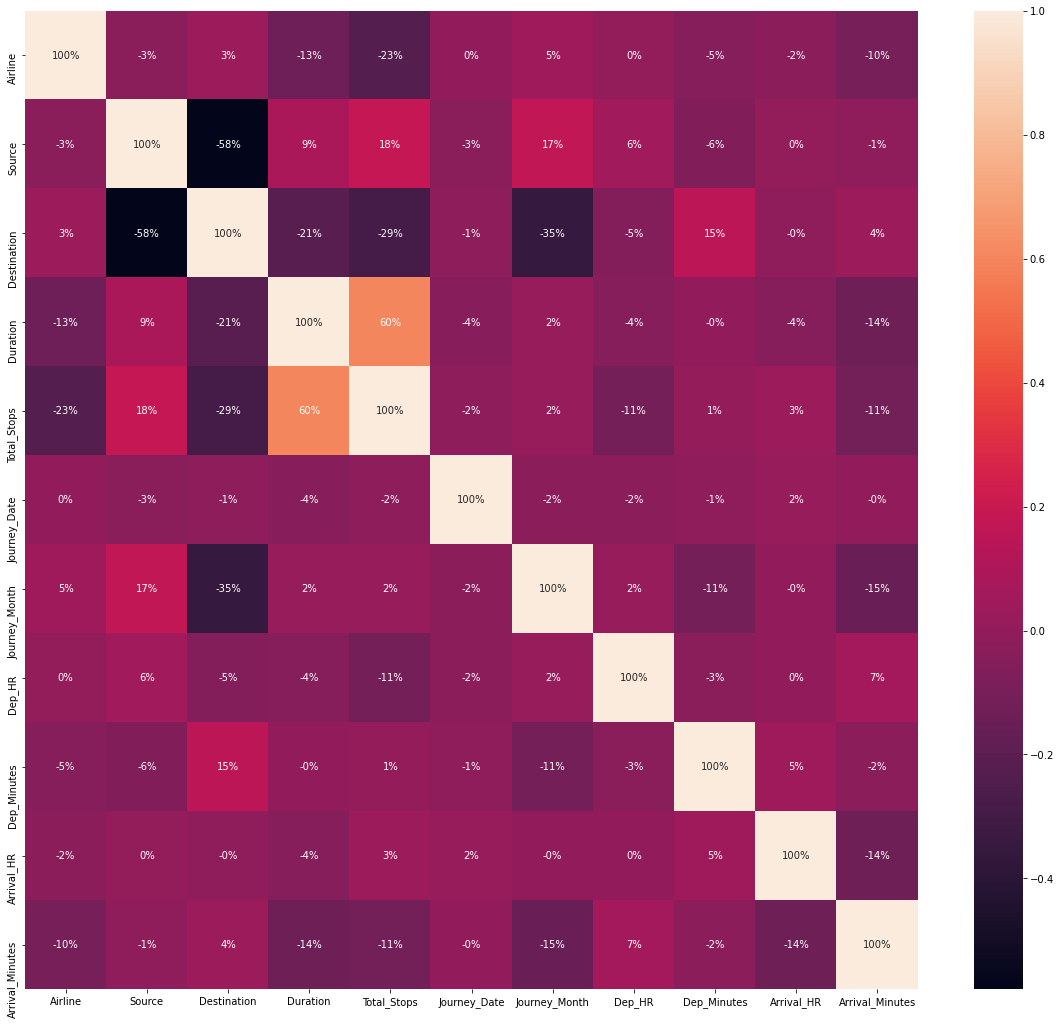

In [314]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot= True, fmt= '.0%')

Observations: We can see that Duration is highly correlated with total stops.

Airline                AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Source              AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Destination         AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Duration            AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
Total_Stops         AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
Journey_Date        AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
Journey_Month       AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
Dep_HR              AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
Dep_Minutes           AxesSubplot(0.125,0.518913;0.0824468x0.16413)
Arrival_HR         AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
Arrival_Minutes    AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
dtype: object

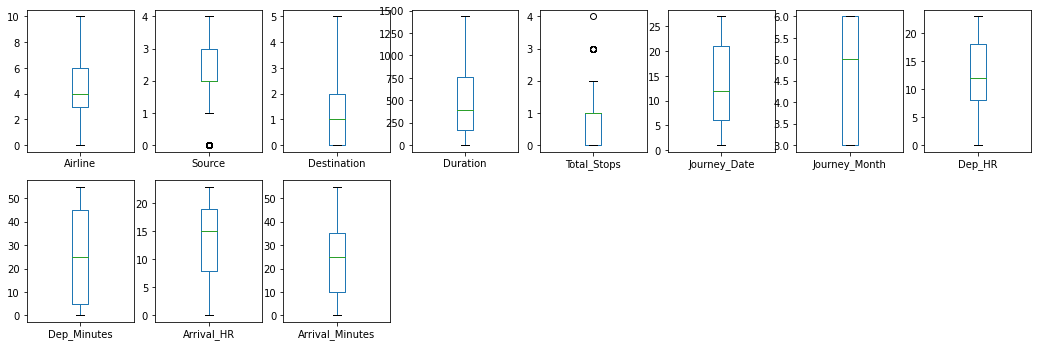

In [315]:
#Checking for the Outliers

df.plot(kind= 'box', subplots= True, layout= (4,8), figsize=(18,12))

Observations: We can see that there no outliers present.

In [316]:
#Splitting DATA
x= df
x.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_Date,Journey_Month,Dep_HR,Dep_Minutes,Arrival_HR,Arrival_Minutes
0,4,2,1,655,1,6,6,17,30,4,25
1,3,3,0,240,1,12,5,6,20,10,20
2,4,2,1,1425,1,21,5,19,15,19,0
3,6,2,1,780,1,21,5,8,0,21,0
4,0,0,2,170,0,24,6,23,55,2,45


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002155A76BBB0>,
      dtype=object)

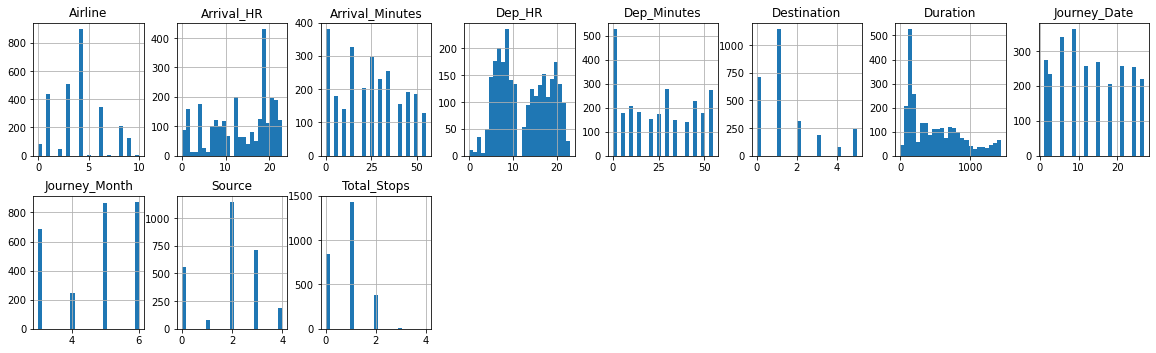

In [317]:
x.hist(figsize=(20,12), layout= (4,8), grid= True, bins=25)

Observations: We can see that duration, Dep_Hr are some what left skewed.

In [318]:
x.skew()

Airline            0.483882
Source            -0.424997
Destination        1.263630
Duration           0.802287
Total_Stops        0.321364
Journey_Date       0.199540
Journey_Month     -0.403700
Dep_HR             0.093759
Dep_Minutes        0.128515
Arrival_HR        -0.443166
Arrival_Minutes    0.115267
dtype: float64

In [319]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
for i in x.columns:
    if x[i].skew()>0.5:
        x[i] = np.log(1+df[i])
x.skew()

Airline            0.483882
Source            -0.424997
Destination        0.283171
Duration          -0.792864
Total_Stops        0.321364
Journey_Date       0.199540
Journey_Month     -0.403700
Dep_HR             0.093759
Dep_Minutes        0.128515
Arrival_HR        -0.443166
Arrival_Minutes    0.115267
dtype: float64

In [320]:
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_Date,Journey_Month,Dep_HR,Dep_Minutes,Arrival_HR,Arrival_Minutes
0,4,2,0.693147,6.486161,1,6,6,17,30,4,25
1,3,3,0.000000,5.484797,1,12,5,6,20,10,20
2,4,2,0.693147,7.262629,1,21,5,19,15,19,0
3,6,2,0.693147,6.660575,1,21,5,8,0,21,0
4,0,0,1.098612,5.141664,0,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0.000000,7.269617,1,6,6,20,30,20,25
2667,3,3,0.000000,5.049856,0,27,3,14,20,16,55
2668,4,2,0.693147,5.981414,1,6,3,21,50,4,25
2669,1,2,0.693147,6.820016,1,6,3,4,0,19,15


In [321]:
#Standardization of Data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaledX= scaler.fit_transform(x)
new_x= pd.DataFrame(data=scaledX, columns= x.columns)
x=new_x
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_Date,Journey_Month,Dep_HR,Dep_Minutes,Arrival_HR,Arrival_Minutes
0,0.011908,0.032567,-0.064173,0.675504,0.247853,-0.837333,1.094745,0.773265,0.267704,-1.361709,0.026340
1,-0.423779,0.877086,-1.308052,-0.415944,0.247853,-0.110877,0.240505,-1.161445,-0.256324,-0.509324,-0.271771
2,0.011908,0.032567,-0.064173,1.521824,0.247853,0.978807,0.240505,1.125030,-0.518338,0.769252,-1.464213
3,0.883281,0.032567,-0.064173,0.865609,0.247853,0.978807,0.240505,-0.809679,-1.304381,1.053380,-1.464213
4,-1.730840,-1.656471,0.663450,-0.789946,-1.239823,1.342035,1.094745,1.828561,1.577774,-1.645837,1.218783
...,...,...,...,...,...,...,...,...,...,...,...
2666,-1.295153,0.877086,-1.308052,1.529441,0.247853,-0.837333,1.094745,1.300913,0.267704,0.911316,0.026340
2667,-0.423779,0.877086,-1.308052,-0.890013,-1.239823,1.705263,-1.467975,0.245617,-0.256324,0.343060,1.815004
2668,0.011908,0.032567,-0.064173,0.125350,0.247853,-0.837333,-1.467975,1.476795,1.315760,-1.361709,0.026340
2669,-1.295153,0.032567,-0.064173,1.039394,0.247853,-0.837333,-1.467975,-1.513210,-1.304381,0.769252,-0.569881


In [322]:
#Loading model

rfr_model= joblib.load('Flight_Price_Prediction_best_rfr_model.obj')

In [323]:
pred_test= rfr_model.predict(x)
pred_test

array([ 7040.42696988,  4680.41266656,  8369.82811826, ...,
       11682.87952481, 12769.77046873,  8841.29102974])

In [324]:
pred_test[0]

7040.426969878657

In [325]:
pred_test[2670]

8841.291029744365

Conclusion: Conclusion: For Analysis of Flight_Price_Prediction project we have selected RandomForestRegressor model which having accuracy 84%.